In [ ]:
##Importing all the necessary modules
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
import tensorflow.keras as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
##Connecting google colab to my drive (omitted in the case of running it locally)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Creating the training set
##Unzipping the zipped training_set sent by you
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/trainset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall("/content/drive/MyDrive")
  print('finish')

finish


In [ ]:
##Adding my image folder (new class of images) to the last sub folder of training_set
from distutils.dir_util import copy_tree

fromDirectory = "/content/drive/MyDrive/0015"
toDirectory = "/content/drive/MyDrive/trainset/0014"

copy_tree(fromDirectory, toDirectory)

['/content/drive/MyDrive/trainset/0014/0015_003/Morgan-Freeman.jpg',
 '/content/drive/MyDrive/trainset/0014/0015_003/t2_MF-Headshot-030813.jpg',
 '/content/drive/MyDrive/trainset/0014/0015_003/MV5BMTc0MDMyMzI2OF5BMl5BanBnXkFtZTcwMzM2OTk1MQ@@._V1_UX214_CR0,0,214,317_AL_.jpg']

In [ ]:
##The training set provided had subfolders within subfolders which were to be utilised. Therefore, defining a function to get the paths of all the subfolders(classes) in a list
def list_of_final_folders(dir):
 items=[]
 wrong_folder_list= os.listdir(dir)
 for element in wrong_folder_list:
      element_path= dir+"/"+element
      right_folder_list=(os.listdir(element_path))
      for index in right_folder_list:
        items.append(os.path.join(element_path+"/", index))
 return items

In [ ]:
##Defining a function to load images from each folder
def load_images_from_folder(folder):
    raw_images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            raw_images.append(img)
    return raw_images

In [ ]:
##Defining a variable to use the Cascade Classifier from the OpenCV predefined face extraction .xml file for face extraction
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
##Defining the parent directory where all the images will be stored within sub directories
parent_dir="/content/drive/MyDrive/pre_processed_images/"

In [ ]:
##Using the function defined above to get the list of paths to the folders which contain the images
list_of_folders= list_of_final_folders("/content/drive/MyDrive/trainset")

In [ ]:
##Finally running each image through the face extraction and saving them in subfolders with class numbers
for i in range(len(list_of_folders)):
 directory = 'Class'+str(i)+"/"
 path = os.path.join(parent_dir, directory)
 os.mkdir(path)
 raw_images= load_images_from_folder(list_of_folders[i])
 for j in range(len(raw_images)):
   faces= face_cascade.detectMultiScale(raw_images[j])
   if len(faces)==1:
     for x, y, w, h in faces:
       actual_image= raw_images[j][y:y+h, x:x+w]
       filename= parent_dir+ directory + "00" + str(j) + '_actual_image.jpg'
       cv2.imwrite(filename, actual_image)

In [ ]:
#Using ImageDataGenerator for image augmentation
train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
training_set= train_datagen.flow_from_directory('/content/drive/MyDrive/pre_processed_images', target_size=(128,128), batch_size=32, class_mode= 'categorical')

Found 3055 images belonging to 1013 classes.


3
Epoch 1/20
95/95 [==============================] - 17s 183ms/step - loss: 6.9829 - acc: 0.0013
Epoch 2/20
95/95 [==============================] - 18s 184ms/step - loss: 6.9096 - acc: 0.0026
Epoch 3/20
95/95 [==============================] - 17s 181ms/step - loss: 6.9025 - acc: 0.0030
Epoch 4/20
95/95 [==============================] - 17s 180ms/step - loss: 6.8960 - acc: 0.0017
Epoch 5/20
95/95 [==============================] - 17s 180ms/step - loss: 6.8901 - acc: 0.0030
Epoch 6/20
95/95 [==============================] - 17s 180ms/step - loss: 6.8841 - acc: 0.0036
Epoch 7/20
95/95 [==============================] - 17s 179ms/step - loss: 6.8790 - acc: 0.0026
Epoch 8/20
95/95 [==============================] - 17s 180ms/step - loss: 6.8736 - acc: 0.0036
Epoch 9/20
95/95 [==============================] - 17s 182ms/step - loss: 6.8688 - acc: 0.0036
Epoch 10/20
95/95 [==============================] - 17s 180ms/step - loss: 6.8643 - acc: 0.0036
Epoch 11/20
95/95 [==================

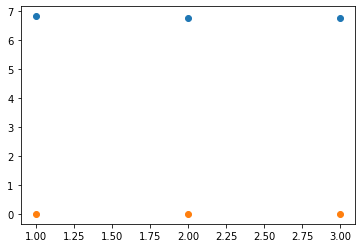

In [ ]:
#Checking the accuracy of ANN models for an inputed number of maximum layers 
#Losses and accuracy are saved in a list for an increasing number of 32 node dense layers and decreasing number of 64 node dense layers assuming number of layers as 1, 2... till the maximum number of layers is reached
#The losses and accuracy are appended and saved in a list. Then plotted assuming labels as 1, 2, 3.. (6 labels for 4 maximum layers considering the combinations, 10 layers for 5 maximum layers considering the combination, etc.)
accuracy=[]
loss=[]
n=input()
n=int(n)
for i in range(1,n):
 for j in range(i):
    model= tf.models.Sequential()
    model.add(tf.layers.Flatten())
    for m in range(i-j):
     model.add(tf.layers.Dense(32, activation="relu"))
    for m in range(j):
     model.add(tf.layers.Dense(64, activation="relu"))
    model.add(tf.layers.Dense(1013, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])
    ann_model= model.fit(training_set, epochs=20, steps_per_epoch= 3055//32)
    l=ann_model.history['loss'][19]
    a=ann_model.history['acc'][19]
    loss.append(l)
    accuracy.append(a)
print(loss)
print(accuracy)

##Plotting the loss and accuracy graphs
sum=0
for i in range(1,n):
  sum=sum+i
def createlistoflabels(g): 
    return list(range(1, g+1))
labels= createlistoflabels(sum)
plt.scatter(labels, loss)
plt.scatter(labels, accuracy)
plt.show()

Epoch 1/20
95/95 [==============================] - 124s 1s/step - loss: 7.3845 - acc: 9.9239e-04
Epoch 2/20
95/95 [==============================] - 121s 1s/step - loss: 6.8001 - acc: 0.0043
Epoch 3/20
95/95 [==============================] - 121s 1s/step - loss: 6.5040 - acc: 0.0179
Epoch 4/20
95/95 [==============================] - 121s 1s/step - loss: 6.1223 - acc: 0.0370
Epoch 5/20
95/95 [==============================] - 121s 1s/step - loss: 5.6557 - acc: 0.0751
Epoch 6/20
95/95 [==============================] - 121s 1s/step - loss: 5.0901 - acc: 0.1379
Epoch 7/20
95/95 [==============================] - 121s 1s/step - loss: 4.4845 - acc: 0.2170
Epoch 8/20
95/95 [==============================] - 121s 1s/step - loss: 3.9650 - acc: 0.2957
Epoch 9/20
95/95 [==============================] - 121s 1s/step - loss: 3.3438 - acc: 0.3814
Epoch 10/20
95/95 [==============================] - 121s 1s/step - loss: 3.0228 - acc: 0.4204
Epoch 11/20
95/95 [==============================] - 12

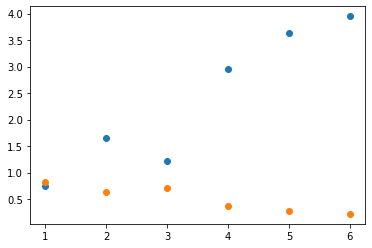

In [ ]:
#Checking the accuracy of CNN models for an inputed number of layers. Losses and accuracy are saved in a list for 
#Losses and accuracy are saved in a list for a decreasing number of convoluted layers with 64 filters and an increasing number of convoluted layers with 128 filters for each number of layers=1, 2,..till maximum number of layers is reached
#The losses and accuracy are appended and saved in a list. Then plotted assuming labels as 1, 2, 3.. (6 labels for 4 maximum layers considering the combinations, 10 layers for 5 maximum layers considering the combination, etc.)
#The filter size is kept constant for the convoluted layers and the pooling layers as I tried it and there was not much increase in accuracy
accuracy=[]
loss=[]
n=input()
n=int(n)
for i in range(1,n):
 for j in range(i):
  model = Sequential();
  model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  for m in range(i-j):                                                   
   model.add(Conv2D(64, (3,3), activation= 'relu'))
   model.add(MaxPooling2D(pool_size=(2,2)))
   model.add(Dropout(0.3))
  for m in range(j):
   model.add(Conv2D(128, (3,3), activation= 'relu'))
   model.add(MaxPooling2D(pool_size=(2,2)))
   model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(tf.layers.Dense(1013, activation="softmax"))
  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])
  cnn_model= model.fit(training_set, epochs=20, steps_per_epoch= 3055//32)
  l=cnn_model.history['loss'][19]
  a=cnn_model.history['acc'][19]
  loss.append(l)
  accuracy.append(a)
print(loss)
print(accuracy)

##Plotting the loss and accuracy graphs
sum=0
for i in range(1,n):
  sum=sum+i
def createlistoflabels(g): 
    return list(range(1, g+1))
labels= createlistoflabels(sum)
plt.scatter(labels, loss)
plt.scatter(labels, accuracy)
plt.show()

In [ ]:
##Training the most accurate model from the graph
model = Sequential();
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(tf.layers.Dense(1013, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])
model.fit(training_set, epochs=30, steps_per_epoch= 3055//32)

Epoch 1/30
95/95 [==============================] - 121s 1s/step - loss: 7.1605 - acc: 3.3080e-04
Epoch 2/30
95/95 [==============================] - 121s 1s/step - loss: 6.8723 - acc: 0.0040
Epoch 3/30
95/95 [==============================] - 124s 1s/step - loss: 6.7563 - acc: 0.0063
Epoch 4/30
95/95 [==============================] - 120s 1s/step - loss: 6.5437 - acc: 0.0152
Epoch 5/30
95/95 [==============================] - 120s 1s/step - loss: 6.1702 - acc: 0.0351
Epoch 6/30
95/95 [==============================] - 120s 1s/step - loss: 5.6742 - acc: 0.0734
Epoch 7/30
95/95 [==============================] - 120s 1s/step - loss: 5.0337 - acc: 0.1485
Epoch 8/30
95/95 [==============================] - 123s 1s/step - loss: 4.3479 - acc: 0.2312
Epoch 9/30
95/95 [==============================] - 120s 1s/step - loss: 3.8381 - acc: 0.3066
Epoch 10/30
95/95 [==============================] - 120s 1s/step - loss: 3.2703 - acc: 0.3907
Epoch 11/30
95/95 [==============================] - 12

In [ ]:
##Saving the model using the HDF5 standard
model.save('my_final_model.h5')